# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
!pip install citipy

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | al khawr
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | necochea
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | brisas de zicatela
Processing Record 13 of Set 1 | kulia village
City not found. Skipping...


In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagos,6.5833,3.7500,26.18,85,62,2.96,NG,1721762397
1,mount gambier,-37.8333,140.7667,10.16,51,100,5.45,AU,1721762398
2,coyhaique,-45.5752,-72.0662,15.34,92,100,4.05,CL,1721762399
3,puerto natales,-51.7236,-72.4875,10.25,53,75,20.58,CL,1721762401
4,mumford,5.2618,-0.7590,23.50,90,12,4.25,GH,1721762404


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

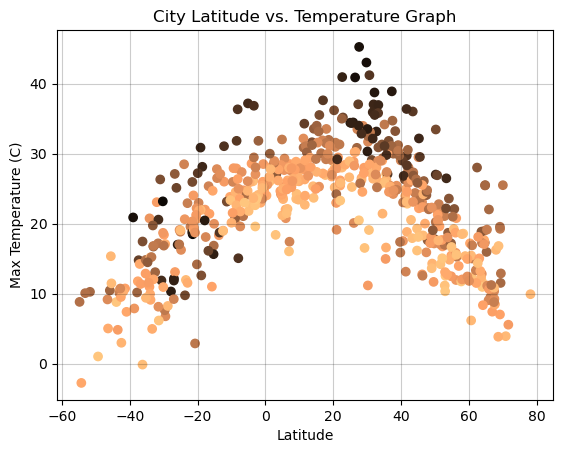

In [22]:
plt.scatter(city_data_df['Lat'], 
            city_data_df['Max Temp'], 
            c = city_data_df['Humidity'], 
            cmap = 'copper')
plt.grid(color = 'black', alpha = .2)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Temperature Graph')
plt.savefig('output_data/Fig1.png')
plt.show()

In [23]:
# Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure


# Show plot
plt.show()

#### Latitude Vs. Humidity

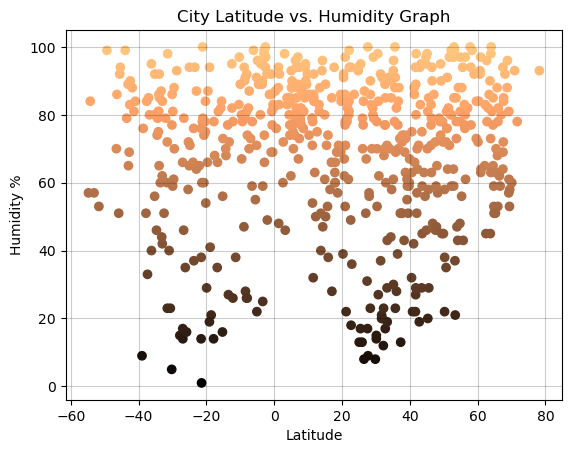

In [27]:
plt.scatter(city_data_df['Lat'], 
            city_data_df['Humidity'], 
            c = city_data_df['Humidity'], 
            cmap = 'copper')
plt.grid(color = 'black', alpha = .2)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs. Humidity Graph')
plt.savefig('output_data/Fig2.png')
plt.show()

In [28]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

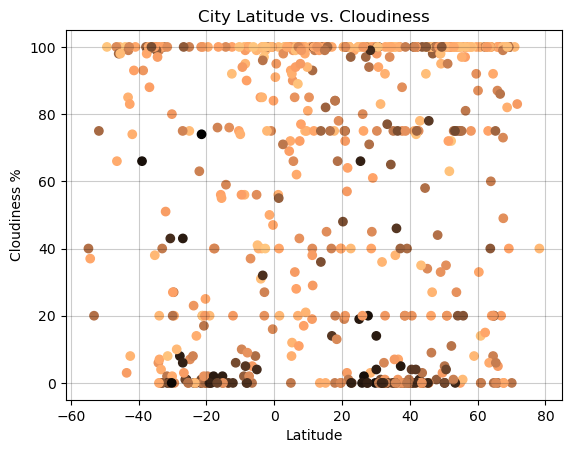

In [32]:
plt.scatter(city_data_df['Lat'], 
            city_data_df['Cloudiness'], 
            c = city_data_df['Humidity'], 
            cmap = 'copper')
plt.grid(color = 'black', alpha = .2)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('City Latitude vs. Cloudiness')
plt.savefig('output_data/Fig3.png')
plt.show()

In [34]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

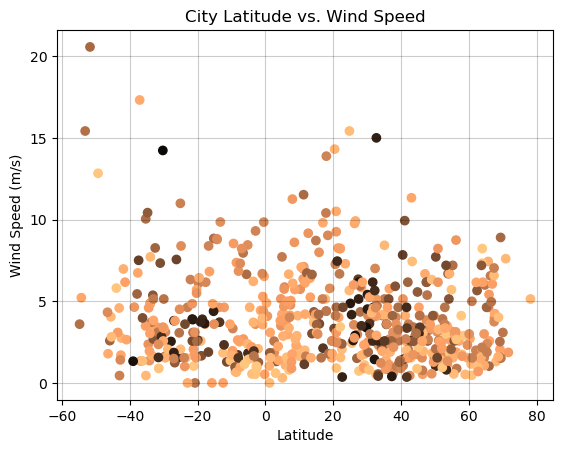

In [37]:
plt.scatter(city_data_df['Lat'], 
            city_data_df['Wind Speed'], 
            c = city_data_df['Humidity'], 
            cmap = 'copper')
plt.grid(color = 'black', alpha = .2)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.savefig('output_data/Fig4.png')
plt.show()

In [38]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def LinearRegressionFunction(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")


    if x_values.iloc[0] >= 0:
        plt.annotate(line_eq,(10,10),fontsize=15,color="red")
    else: 
        plt.annotate(line_eq,(-10,10),fontsize=15,color="red")


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lagos,6.5833,3.7500,26.18,85,62,2.96,NG,1721762397
4,mumford,5.2618,-0.7590,23.50,90,12,4.25,GH,1721762404
10,bilibino,68.0546,166.4372,16.25,92,100,1.31,RU,1721762411
11,altay,47.8667,88.1167,17.62,47,1,2.57,CN,1721762412
13,stanley,54.8680,-1.6985,15.44,81,0,2.57,GB,1721762415


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount gambier,-37.8333,140.7667,10.16,51,100,5.45,AU,1721762398
2,coyhaique,-45.5752,-72.0662,15.34,92,100,4.05,CL,1721762399
3,puerto natales,-51.7236,-72.4875,10.25,53,75,20.58,CL,1721762401
5,chos malal,-37.3781,-70.2709,14.77,33,99,7.51,AR,1721762405
6,west island,-12.1568,96.8225,25.99,78,20,4.63,CC,1721762407


###  Temperature vs. Latitude Linear Regression Plot

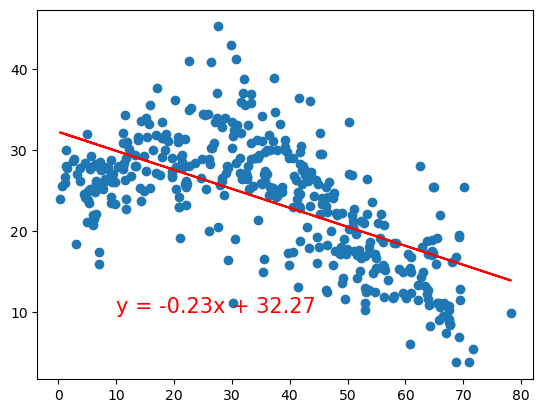

In [49]:
LinearRegressionFunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

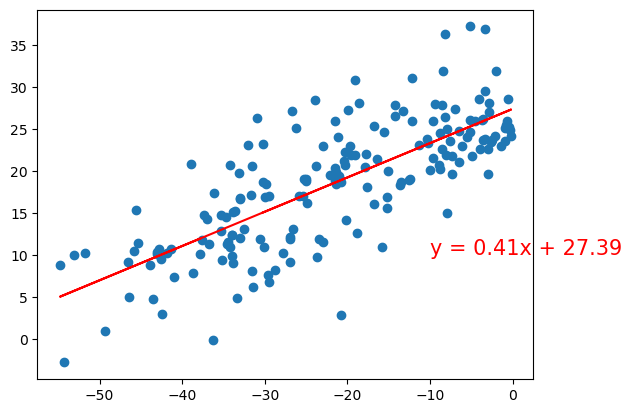

In [51]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
LinearRegressionFunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

In [53]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** There is a positive slope from the southern hemisphere where the lower the latitude the lower the Max temp and a negative slope in the northern hemisphere where the the higher the latitude, the lower the Max temp, Implying that the closer you are to the equater the higher the max temp

### Humidity vs. Latitude Linear Regression Plot

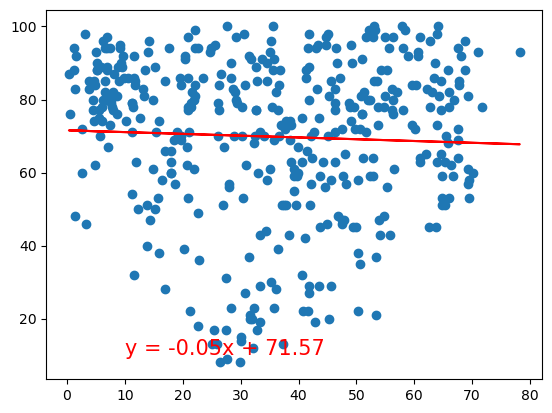

In [57]:
# Northern Hemisphere
# YOUR CODE HERE
LinearRegressionFunction(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

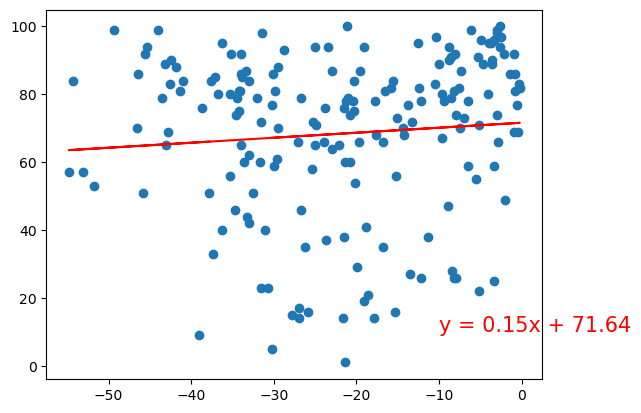

In [59]:
# Southern Hemisphere
# YOUR CODE HERE
LinearRegressionFunction(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** There is no correlation between humidity and latitude in the world, both having near flat slopes

### Cloudiness vs. Latitude Linear Regression Plot

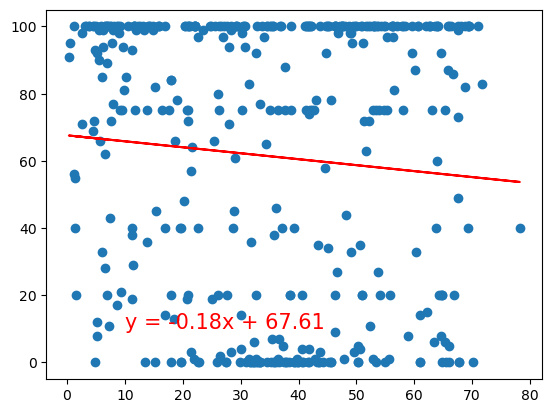

In [63]:
# Northern Hemisphere
# YOUR CODE HERE
LinearRegressionFunction(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

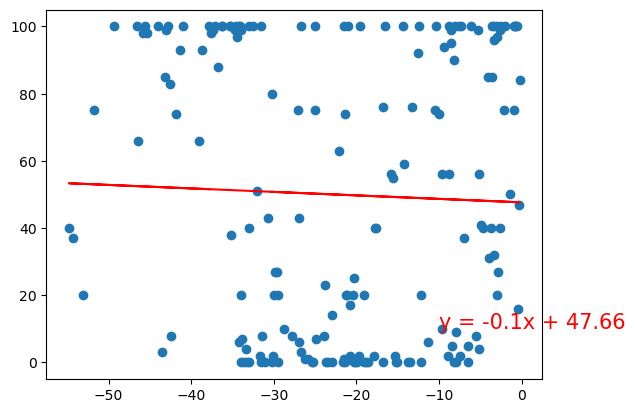

In [290]:
# Southern Hemisphere
# YOUR CODE HERE
LinearRegressionFunction(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** There is no correlation between cloudiness and Latitude, with both having a near flat slope curve

### Wind Speed vs. Latitude Linear Regression Plot

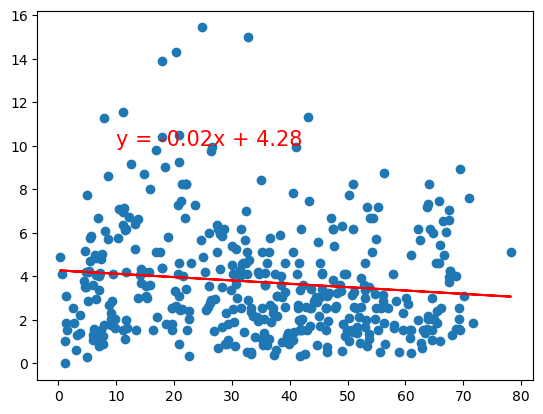

In [294]:
# Northern Hemisphere
# YOUR CODE HERE
LinearRegressionFunction(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

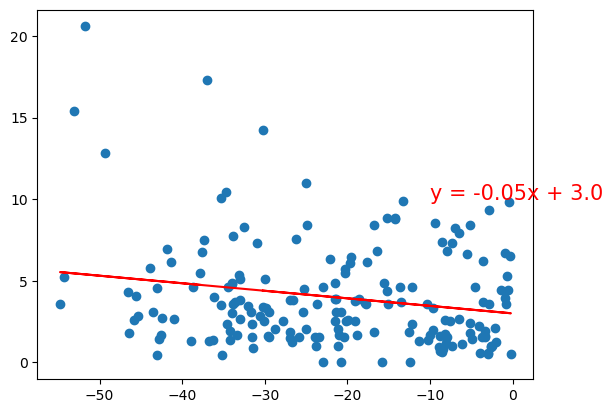

In [296]:
# Southern Hemisphere
# YOUR CODE HERE
LinearRegressionFunction(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** There is no correlation between Wind Speed and Latitude, with a near zero slope for both hemisphere graphs